# Predict Grades
We use a simple logistic regression model to predict grades based on past year results

# Perform Cursory Data Analysis

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from IPython.display import display

In [59]:
# Read data
df = pd.read_csv('./data.csv')
display(df)

,hw1,hw2,exam1,hw3,hw4,hw5,exam2,hw6,hw7,exam3,grade
0,55,95,59,100,100,90,36,70,100.0,83,B
1,90,70,65,100,100,100,72,100,90.0,75,A
2,70,100,60,100,100,100,70,90,95.0,40,B+
3,90,100,51,100,0,90,25,100,100.0,79,C+
4,90,100,78,100,50,90,95,90,90.0,10,A-
5,80,100,58,95,90,55,39,65,95.0,15,C
6,90,100,58,100,90,80,56,60,95.0,50,B
7,90,95,60,90,100,80,52,90,100.0,22,B-
8,90,100,52,75,50,30,40,60,0.0,53,C
9,80,100,70,100,100,100,42,100,70.0,82,A-


In [60]:
# describe
df.describe()

,hw1,hw2,exam1,hw3,hw4,hw5,exam2,hw6,hw7,exam3
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,71.859155,80.204225,57.077465,80.767606,78.732394,70.035211,52.239437,76.492958,79.631690,43.802817
std,26.521125,28.634042,23.249212,27.033907,33.950510,30.931269,27.895685,31.740022,30.847098,25.792197
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,70.000000,48.250000,70.000000,76.250000,55.250000,35.250000,70.000000,80.000000,25.500000
50%,80.000000,95.000000,58.000000,90.000000,100.000000,80.000000,55.000000,90.000000,90.000000,45.000000
75%,90.000000,100.000000,70.750000,100.000000,100.000000,93.750000,70.000000,100.000000,100.000000,63.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [61]:
# count number of grades and plot distribution
grade_dist = df.groupby('grade').count()['hw1']
display(grade_dist)

grade
A     17
A+    15
A-    17
B     14
B+    13
B-    12
C      8
C+    10
C-    10
F     26
Name: hw1, dtype: int64

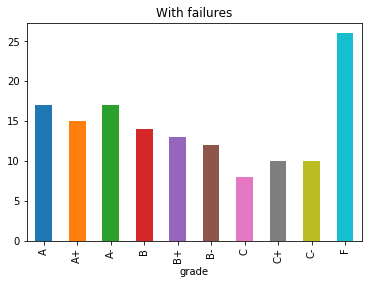

In [62]:
# plot bar graph of grade distribution with failures
grade_dist.plot(kind="bar", title="With failures")

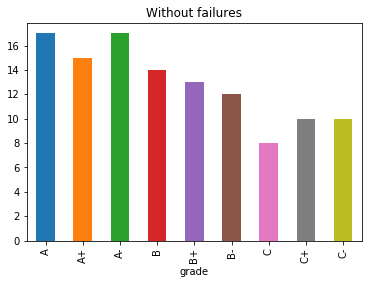

In [63]:
es")

## Notes
We note that the grade distribution without failures is skewed towards A

# Logistic Regression
We now prepare the data for logistic regression. Note we are using multinomial/multiclass logistic regression here.

In [91]:
# obtain one hot vector representation for grades
# this is our y
y = df['grade'].str.get_dummies()

# for X we only take hw1 to exam1 because we want to use this values to guess the final grade
X = df.loc[:, "hw1":"exam1"]

In [92]:
one_hot

,A,A+,A-,B,B+,B-,C,C+,C-,F
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [93]:
# fit
model = sm.MNLogit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 2.030523
         Iterations 6


In [97]:
display(result.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:                      y   No. Observations:                  142
Model:                        MNLogit   Df Residuals:                      115
Method:                           MLE   Df Model:                           18
Date:                Mon, 03 Dec 2018   Pseudo R-squ.:                 0.09689
Time:                        19:46:42   Log-Likelihood:                -288.33
converged:                       True   LL-Null:                       -319.27
                                        LLR p-value:                 1.016e-06
==============================================================================
      y=A+       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1           -0.0048      0.015     -0.317      0.751      -0.034       0.025
hw2           -0.0196      0.016     -1.201      0.230      -0.052       0.012
exam1          0.0263      0.020      1.333      0.183      -0.012       0.065
------------------------------------------------------------------------------
      y=A-       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0194      0.016      1.190      0.234      -0.013       0.051
hw2            0.0181      0.016      1.095      0.274      -0.014       0.050
exam1         -0.0463      0.022     -2.123      0.034      -0.089      -0.004
------------------------------------------------------------------------------
       y=B       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0104      0.017      0.601      0.548      -0.023       0.044
hw2            0.0280      0.018      1.594      0.111      -0.006       0.062
exam1         -0.0535      0.024     -2.258      0.024      -0.100      -0.007
------------------------------------------------------------------------------
      y=B+       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0025      0.017      0.145      0.885      -0.031       0.036
hw2            0.0286      0.018      1.609      0.108      -0.006       0.063
exam1         -0.0464      0.024     -1.945      0.052      -0.093       0.000
------------------------------------------------------------------------------
      y=B-       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0027      0.018      0.149      0.882      -0.032       0.038
hw2            0.0245      0.018      1.340      0.180      -0.011       0.060
exam1         -0.0427      0.024     -1.744      0.081      -0.091       0.005
------------------------------------------------------------------------------
       y=C       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0065      0.020      0.328      0.743      -0.033       0.046
hw2            0.0457      0.019      2.366      0.018       0.008       0.083
exam1         -0.0869      0.029     -2.962      0.003      -0.144      -0.029
------------------------------------------------------------------------------
      y=C+       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hw1            0.0158      0.019      0.819      0.413      -0.022       0.054
hw2            0.0388      0.019      2.052      0.040       0.002       0.076
ex

## Notes
We note that hw scores in general are positive while exam scores are negative. This is not the case for A+. It means that people who score A+ generally are reliant on exam scores to pull their grades, while people who score lower may relyo n hw grades to pull marks up

# Prediction
Given the data we predict grades given hw1, hw2, exam1

In [138]:
# predict grades with model
predict = result.predict([85,70,55])[0]

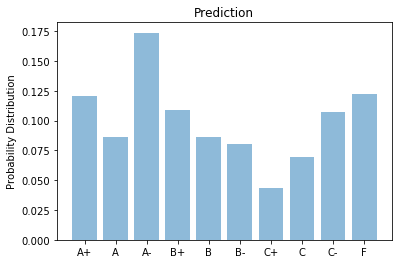

In [139]:
grades = ["A+","A","A-","B+","B","B-","C+","C","C-","F"]
y_pos = np.arange(len(grades))
 
plt.bar(y_pos, predict, align='center', alpha=0.5)
plt.xticks(y_pos, grades)
plt.ylabel('Probability Distribution')
plt.title('Prediction')

In [150]:
predicted_grade = grades[np.where(predict==np.max(predict))[0][0]]
print("Predicted Grade = {}".format(predicted_grade))

Predicted Grade = A-
